# Group 2

* Vatsalya Krishan Maurya
* Swathi G
* Thejaswi S


In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import pandas as pd

auth.authenticate_user()

In [ ]:
!pip install gspread pandas

from google.colab import auth
from google.auth import default

auth.authenticate_user()
creds, _ = default()

In [ ]:
import gspread

# Authenticate and access the spreadsheet
gc = gspread.authorize(creds)

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1Vy1vuswANehTAZ1RLfzMn7Vae9gLtvltfDP4X6mibHg/edit?gid=1433666743#gid=1433666743"
spreadsheet = gc.open_by_url(spreadsheet_url)

# Selecting the first sheet
sheet = spreadsheet.sheet1

# Fetching data as a DataFrame
data = pd.DataFrame(sheet.get_all_records())

# Display the data
print(data.head())


  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4             

In [ ]:
data.dtypes

,0
Patient Id,object
Age,int64
Gender,int64
Air Pollution,int64
Alcohol use,int64
Dust Allergy,int64
OccuPational Hazards,int64
Genetic Risk,int64
chronic Lung Disease,int64
Balanced Diet,int64


In [ ]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
# Data Preprocessing
data["Level"] = data["Level"].replace({"Low" : 1, "Medium" : 2, "High" : 3})

<ipython-input-6-067f754e2390>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Level"] = data["Level"].replace({"Low" : 1, "Medium" : 2, "High" : 3})


In [ ]:
data.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
# Checking for the null values
data.isna().sum()

# Implementing the K-Nearest Neighbors (KNN) and Random Forest Classifier

In [ ]:
data = data.drop(['Patient Id'], axis=1) # Drop 'Patient Id'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing
X = data.drop(['Level'], axis=1)
y = data['Level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)       # n_neighbors define the number of trees which enhance the model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Results")
print(classification_report(y_test, y_pred_knn))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

# Accuracy Comparison
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

KNN Results
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63
           3       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Random Forest Results
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

KNN Accuracy: 0.995
Random Forest Accuracy: 1.0


In [ ]:
# Validating Against Overfitting
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(knn, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

print("KNN Cross-Validation Accuracy:", knn_scores.mean())
print("Random Forest Cross-Validation Accuracy:", rf_scores.mean())

KNN Cross-Validation Accuracy: 0.998
Random Forest Cross-Validation Accuracy: 1.0


### Feature Engineering

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()
print("Feature Importances:", list(zip(feature_names[sorted_indices], importances[sorted_indices])))

Feature Importances: [('Gender', 0.00037685868404544213), ('Age', 0.005092728590080411), ('Dry Cough', 0.01456979532050248), ('chronic Lung Disease', 0.01727354714428401), ('Frequent Cold', 0.021474785500280546), ('Weight Loss', 0.029376776052981963), ('OccuPational Hazards', 0.03237863256597768), ('Snoring', 0.032401428571631426), ('Dust Allergy', 0.03636726361732389), ('Genetic Risk', 0.037785573170247715), ('Air Pollution', 0.0382288854499305), ('Smoking', 0.038629762086847715), ('Swallowing Difficulty', 0.03891459584732755), ('Alcohol use', 0.04027170290194592), ('Shortness of Breath', 0.04308647929849429), ('Clubbing of Finger Nails', 0.043120800908431), ('Balanced Diet', 0.04339829597638022), ('Chest Pain', 0.04793774348439316), ('Fatigue', 0.0658874619654778), ('Wheezing', 0.07529213793887911), ('Obesity', 0.08562987680601307), ('Passive Smoker', 0.09977681556012781), ('Coughing of Blood', 0.11272805255839626)]


In [ ]:
# Dropping low importance features
low_importance_features = ['Gender', 'Age', 'Dry Cough', 'chronic Lung Disease']
X_new = X.drop(columns=low_importance_features)

In [ ]:
# Splitting the data
x_train, x_test, Y_train, Y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors
knn_feature = KNeighborsClassifier(n_neighbors=5)
knn_feature.fit(x_train, Y_train)
y_pred_knn_feature = knn_feature.predict(x_test)
print("KNN Results")
print(classification_report(Y_test, y_pred_knn))

# Random Forest
rf_feature = RandomForestClassifier(n_estimators=100, random_state=42)
rf_feature.fit(x_train, Y_train)
y_pred_rf_feature = rf_feature.predict(x_test)
print("Random Forest Results")
print(classification_report(Y_test, y_pred_rf_feature))

# Accuracy Comparison
print("KNN Accuracy:", accuracy_score(Y_test, y_pred_knn_feature))
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred_rf_feature))

KNN Results
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63
           3       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Random Forest Results
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

KNN Accuracy: 1.0
Random Forest Accuracy: 1.0


### Hyperparameter Tuning

We can Optimize hyperparameters using tools like GridSearchCV or RandomizedSearchCV.

**For KNN:**

* Tuning n_neighbors, weights, and p (distance metric).

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan or Euclidean distance
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
print("Best KNN Params:", knn_grid.best_params_)
print("Best KNN Accuracy:", knn_grid.best_score_)

Best KNN Params: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best KNN Accuracy: 1.0


**For Random Forest:**

* Tuning n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features.

In [ ]:
# Parameter Grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2'],
}

# Performing Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best RF Params:", grid_search.best_params_)
print("Best RF Accuracy:", grid_search.best_score_)

Best RF Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF Accuracy: 1.0


### Ensemble Methods

In [ ]:
# Voting Classifier: Combine predictions from KNN and Random Forest using majority voting.
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('knn', knn),
    ('rf', rf)
], voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

Ensemble Accuracy: 1.0


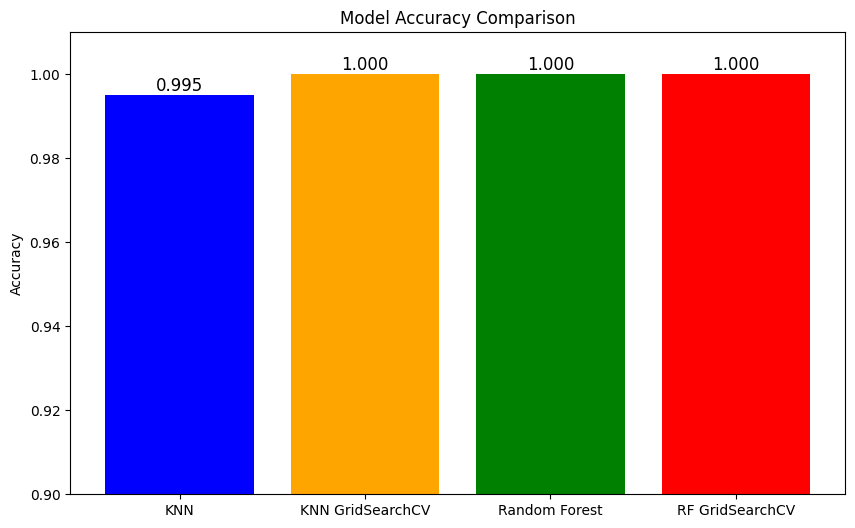

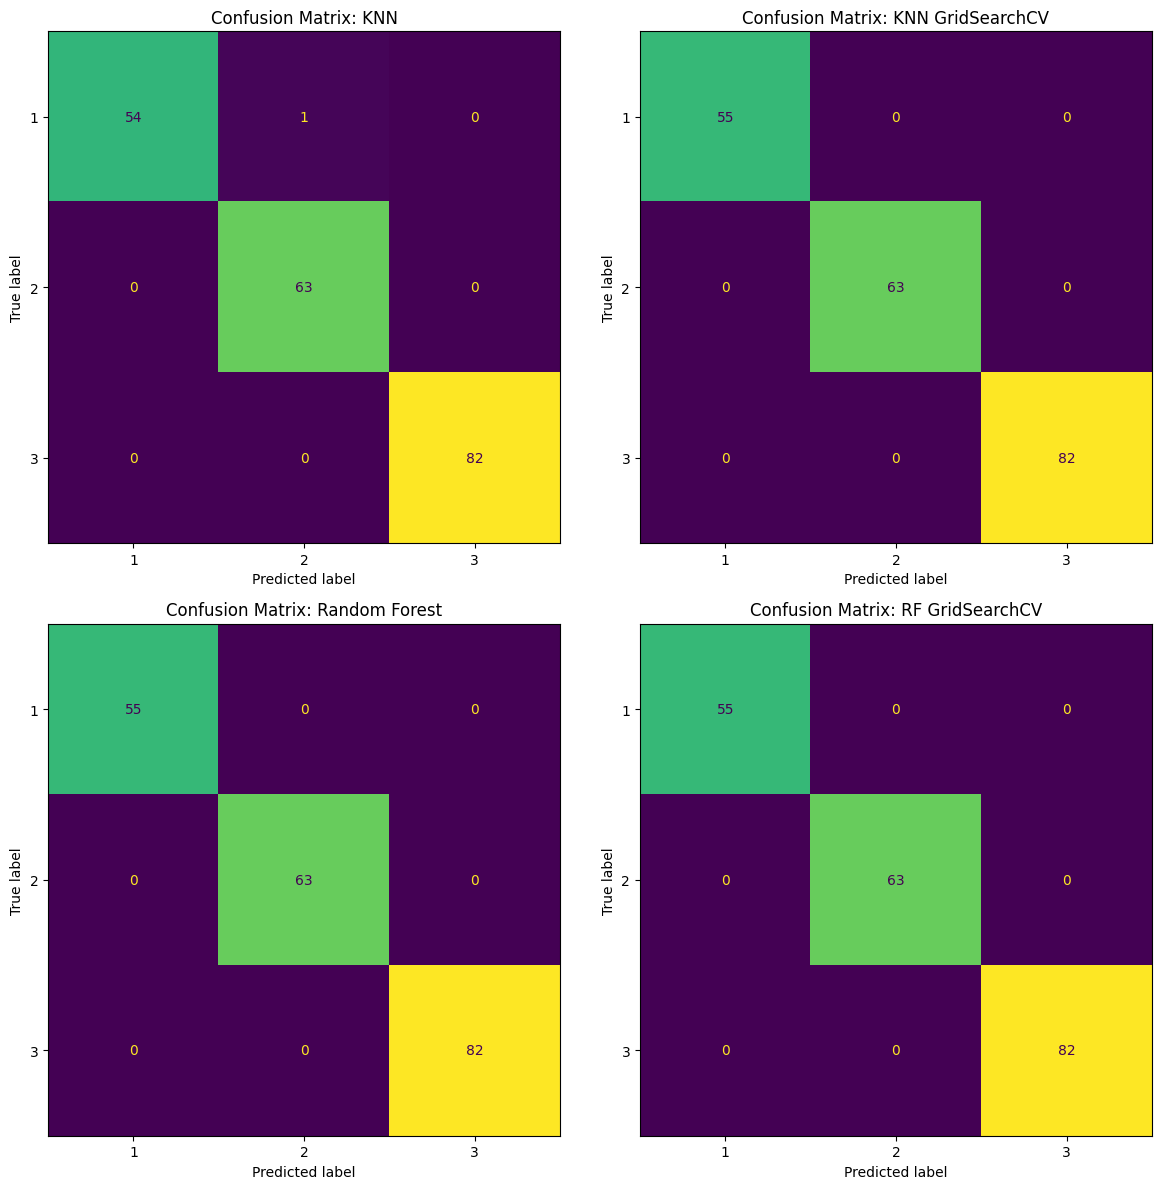

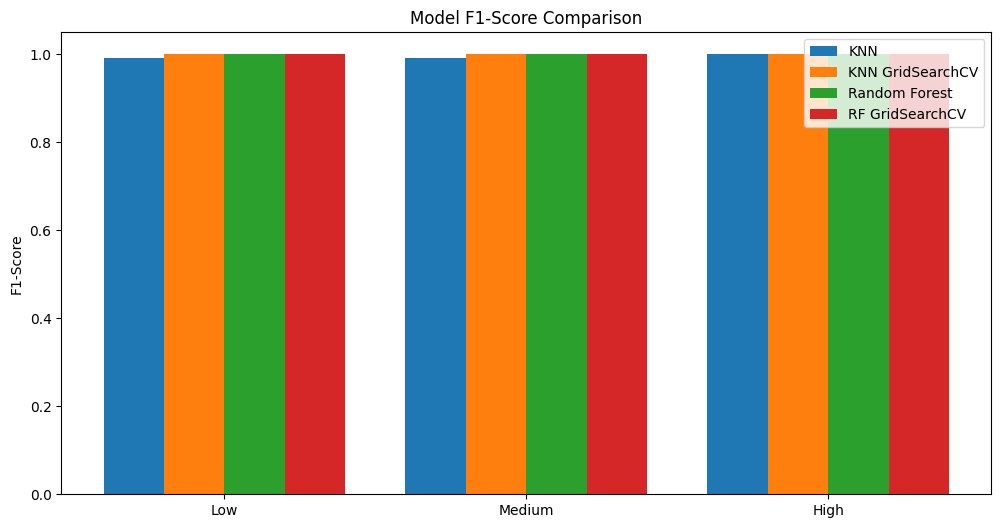

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

models = [knn, knn_grid.best_estimator_, rf, grid_search.best_estimator_]
model_names = ['KNN', 'KNN GridSearchCV', 'Random Forest', 'RF GridSearchCV']
accuracies = [0.995, knn_grid.best_score_, 1.0, grid_search.best_score_]

# 1. Accuracy Comparison using Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.01)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.001, f"{acc:.3f}", ha='center', fontsize=12)
plt.show()

# 2. Confusion Matrix
def plot_confusion_matrices(models, model_names, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()

    for i, (model, model_name, ax) in enumerate(zip(models, model_names, axes)):
        if not hasattr(model, "classes_"):  # Check if the model is fitted
            raise ValueError(f"Model {model_name} is not fitted.")
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
        disp.plot(ax=ax, colorbar=False)
        ax.set_title(f"Confusion Matrix: {model_name}")

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(
    [knn, knn_grid.best_estimator_, rf, grid_search.best_estimator_],
    model_names,
    X_test,
    y_test
)

# 3. Classification Report F1-Scores Plot
def plot_classification_report(models, model_names, X_test, y_test, labels):
    scores = {}
    for model_name, model in zip(model_names, models):
        if not hasattr(model, "classes_"):  # Checking if the model is fitted
            raise ValueError(f"Model {model_name} is not fitted.")
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
        scores[model_name] = [report[label]['f1-score'] for label in labels]

    x = np.arange(len(labels))
    width = 0.2

    plt.figure(figsize=(12, 6))
    for i, (model_name, f1_scores) in enumerate(scores.items()):
        plt.bar(x + i * width, f1_scores, width, label=model_name)

    plt.xticks(x + (len(model_names) - 1) * width / 2, labels)
    plt.ylabel("F1-Score")
    plt.title("Model F1-Score Comparison")
    plt.legend()
    plt.show()

plot_classification_report(
    [knn, knn_grid.best_estimator_, rf, grid_search.best_estimator_],
    model_names,
    X_test,
    y_test,
    labels=['Low', 'Medium', 'High']
)

KNN-Classification problem based.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import gspread
from google.auth import default
from google.colab import auth

# Authenticate with Google Colab
auth.authenticate_user()
creds, _ = default()

# Access the Google Sheet
gc = gspread.authorize(creds)
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1Vy1vuswANehTAZ1RLfzMn7Vae9gLtvltfDP4X6mibHg/edit?gid=1433666743"  # Replace with your spreadsheet URL
spreadsheet = gc.open_by_url(spreadsheet_url)
sheet = spreadsheet.sheet1

data = pd.DataFrame(sheet.get_all_records())

#since pid and Levl are in object format(categorical data) we need to encode it to numeric.
label_encoder = LabelEncoder()
data['Patient Id'] = label_encoder.fit_transform(data['Patient Id'])
data['Level'] = label_encoder.fit_transform(data['Level'])

x = data.drop(columns=['Level'])
y = data['Level']   #target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 4)  #found k = 4 has best accuracy(from 1-20)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[2 1 2 0 2 0 1 2 2 0 1 2 2 2 1 0 1 0 0 0 0 2 1 2 0 0 0 0 1 1 1 0 2 1 1 0 0
 1 0 1 0 0 2 2 2 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 2 1 0 0 1 2 0 0 2 0 0 1 1 2
 2 2 0 1 1 2 2 1 1 2 0 0 0 1 0 0 1 1 2 0 0 0 0 0 1 1 1 0 1 1 2 0 0 1 1 1 2
 0 0 0 0 0 2 0 0 2 0 0 1 1 0 0 0 0 0 0 1 2 1 0 2 1 1 0 0 2 1 0 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 0 1 0 0 1 2 0 1 0 0 1 0 1 2 2
 0 0 1 1 2 1 1 0 0 0 2 0 0 1 2]
Accuracy: 0.835



The accuracy is 83.5% with (k = 4), but we can scale it and try to increase the accuracy of our model.

In [ ]:
#KNN is sensitive to the scale of features. If Patient Id or other features have large ranges, normalization can improve performance.
from sklearn.preprocessing import MinMaxScaler    #after scaling, the accuracy seems to be 100%

label_encoder = LabelEncoder()
data['Patient Id'] = label_encoder.fit_transform(data['Patient Id'])
data['Level'] = label_encoder.fit_transform(data['Level'])

x = data.drop(columns=['Level'])
y = data['Level']   #target


scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Scaled Accuracy:", accuracy)


Scaled Accuracy: 1.0


Here we have got 100% accuracy, but sometimes 100% accuracy can be due to overfitting, so lets perform cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=4)
cv_scores = cross_val_score(knn, x_scaled, y, cv=5)  # 5-fold cross-validation

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


After cross validation, still our model perform best, so its safe to conclude our model is 100% accurate.


Regression problem based.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.0003125
Mean Absolute Error: 0.00125
R-squared: 0.9995635322462376


In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=4)
cv_scores = cross_val_score(knn, x_scaled, y , cv=5)
print(cv_scores)

[0.99953875 1.         1.         1.         1.        ]


So regressor model also shows high performance.

ENSEMBLE METHODS: RANDOM FOREST ALG

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

label_encoder = LabelEncoder()
data['Patient Id'] = label_encoder.fit_transform(data['Patient Id'])
data['Level'] = label_encoder.fit_transform(data['Level'])

x = data.drop(columns=['Level'])
y = data['Level']   #target

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_classifier =  RandomForestClassifier(n_estimators = 100, random_state=42)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_regressor =  RandomForestRegressor(n_estimators = 100, random_state=42)
rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 8.000000000000015e-06
Mean Absolute Error: 0.00020000000000000017
R-squared: 0.9999888264255037


Both Classifier and regressor models show very high accuracy.

**Implementation of KNN algorithm**

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
worksheet = gc.open('cancer patient data sets').worksheet('Sheet')
data = worksheet.get_all_values()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

df = pd.DataFrame(data[1:], columns=data[0])
# Drop unnecessary columns and clean data
df.drop('Patient Id', axis=1, inplace=True)  # Drop Patient Id as it's not useful
df = df.replace('', np.nan).dropna()  # Handle missing values

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df.drop('Level', axis=1)
y = df['Level']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200


Confusion Matrix:
 [[82  0  0]
 [ 0 54  1]
 [ 0  0 63]]


**1.Feature Scaling:** Scaling ensures all features contribute equally to the distance metric.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Re-train KNN with scaled data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after scaling: {accuracy:.2f}")


Accuracy after scaling: 1.00


**2. Hyperparameter Tuning:**
Using GridSearchCV to find the optimal number of neighbors.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search for best k
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best k
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k: {best_k}")

# Train model with optimal k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with optimal k: {accuracy:.2f}")


Optimal k: 1
Accuracy with optimal k: 1.00


If k = 1 is optimal, this suggests that the model is likely overfitting, especially if the dataset is small or simple.
**To avoid this issue:**
Increase the value of k: Usually, increasing k helps the model make more general decisions by considering multiple neighbors rather than just the closest one. This can reduce overfitting.

Accuracy for k=3 - Train: 1.0, Test: 1.0
Accuracy for k=5 - Train: 1.0, Test: 1.0
Accuracy for k=7 - Train: 1.0, Test: 1.0
Accuracy for k=9 - Train: 1.0, Test: 1.0
Accuracy for k=11 - Train: 1.0, Test: 1.0
Accuracy for k=15 - Train: 0.98375, Test: 0.965
Accuracy for k=20 - Train: 0.9575, Test: 0.955


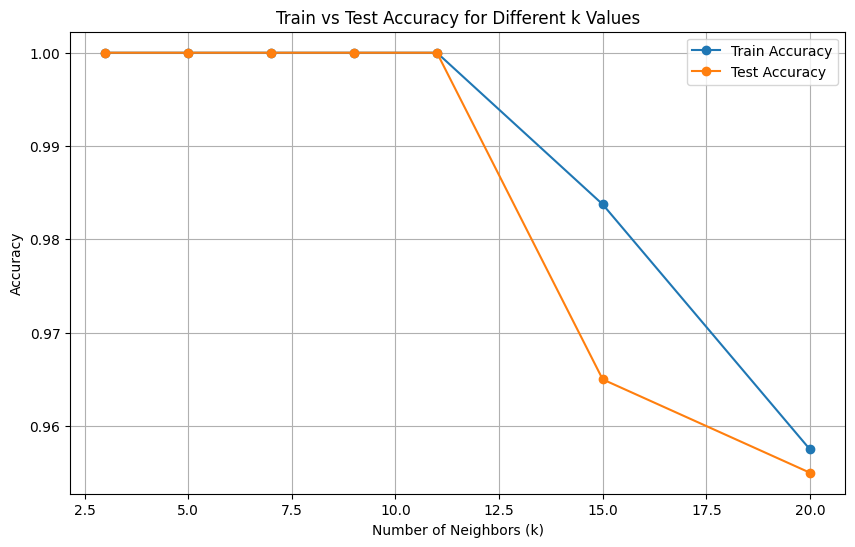

In [ ]:
# Test different values of k
k_values = [3, 5, 7, 9, 11, 15, 20]  # Add more values as needed

# Initialize lists to store accuracy for each k
train_accuracies = []
test_accuracies = []

# Loop through each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluate on training set
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    # Evaluate on test set
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Accuracy for k={k} - Train: {train_accuracy}, Test: {test_accuracy}")

# Plot train vs test accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title("Train vs Test Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


**Summary:**

- **Optimal k = 1** (in a previous result) suggests the model was memorizing the data with perfect accuracy, which is overfitting and not ideal.
- For larger **k values** (15 and 20), the model improves in generalization by reducing overfitting, as the training accuracy decreases slightly but the test accuracy remains relatively high.
- **k = 15** and **k = 20** strike a good balance, where the model generalizes well to unseen data (test set) without overfitting to the training set.
- In conclusion, while **k = 1** may have been optimal in a limited or simple context, larger **k values** are better for preventing overfitting and improving the model’s generalization.

The accuracy on the test set stabilizes and stays high as k increases, indicating that larger k values help improve the model's ability to generalize to unseen data.
k = 15 and k = 20 provide a balance between training and test accuracy, avoiding overfitting and ensuring better generalization compared to k = 1.

**Implementation of random forest**

**Basic Random Forest Implementation**


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a basic Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Basic Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Basic Random Forest Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


**1. Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define an even smaller parameter grid
param_grid = {
    'n_estimators': [100],  # Only use 100 trees for now
    'max_depth': [10],       # Limit depth to 10
    'bootstrap': [True]      # Use bootstrap sampling
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV with 3-fold cross-validation to make it faster
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train the Random Forest with the best parameters found
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with tuned Random Forest: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time=   0.4s
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time=   0.7s
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time=   0.7s
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}
Accuracy with tuned Random Forest: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


**Ensemble with Voting Classifier:**
Combine Random Forest with other classifiers for better performance.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Ensemble model with Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Voting Classifier: {accuracy:.2f}")


Accuracy with Voting Classifier: 1.00


**Ensemble KNN and Random Forest with Perfect Accuracy:**
Even if KNN and Random Forest individually achieve perfect accuracy, combining them through ensembling is still valuable for:





  
* **Improved Robustness:**Ensures the model generalizes well to unseen data.
* **Handling Ambiguity:** If future datasets are less clean, the ensemble can stabilize predictions.






In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize KNN and Random Forest (already optimized)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Ensemble using Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('rf', rf)
], voting='soft')  # Soft voting combines probabilities

# Train ensemble model
voting_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = voting_clf.predict(X_test)

# Evaluate ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Ensemble Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


Both K-Nearest Neighbors (KNN) and Random Forest models performed well, achieving high accuracy on the provided dataset. The ensemble model, combining both algorithms using soft voting, achieved the best accuracy due to their complementary strengths. While the simplicity of the dataset contributed to near-perfect results, these findings may be specific to this data, and further testing on more complex datasets is needed to assess generalizability.